In [1]:
import pandas as pd
import glob
import os

In [2]:
# Path to the folder containing your files
folder_path = '../dataset'

# Initialize an empty list to store DataFrames
dfs = []

# Iterate over each file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):  # Assuming all files are CSV, you can change the condition accordingly
        file_path = os.path.join(folder_path, filename)
        # Try different encodings to read the file
        for encoding in ['utf-8', 'latin-1']:  # You can add more encodings to try if needed
            try:
                df = pd.read_csv(file_path, encoding=encoding)
                dfs.append(df)  # Append the DataFrame to the list
                break  # Break the loop if reading is successful
            except UnicodeDecodeError:
                print(f"Error decoding file {filename} with encoding {encoding}. Trying another encoding...")

# Concatenate all DataFrames in the list into one
combined_df = pd.concat(dfs, ignore_index=True)

C:\Users\prana\AppData\Local\Temp\ipykernel_6408\3920506851.py:14: DtypeWarning: Columns (0,1,2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding=encoding)
C:\Users\prana\AppData\Local\Temp\ipykernel_6408\3920506851.py:14: DtypeWarning: Columns (0,1,2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding=encoding)
C:\Users\prana\AppData\Local\Temp\ipykernel_6408\3920506851.py:14: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding=encoding)
C:\Users\prana\AppData\Local\Temp\ipykernel_6408\3920506851.py:14: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding=encoding)


Error decoding file Mobi_System_Data_2023-06.csv with encoding utf-8. Trying another encoding...
Error decoding file Mobi_System_Data_2023-07.csv with encoding utf-8. Trying another encoding...
Error decoding file Mobi_System_Data_2023-08.csv with encoding utf-8. Trying another encoding...


In [72]:
combined_df.tail()

,Departure,Return,Electric bike,Departure station,Return station,Membership type,Covered distance (m),Duration (sec.),Departure temperature (C),Return temperature (C),Stopover duration (sec.),Number of stopovers,Bike
1549263,2024-01-01 0:00,2024-01-01 1:00,False,0099 šxʷƛ̓ənəq Xwtl'e7énḵ Square - Vancouver A...,0193 Science World,Pay Per Ride,10467.0,3086.0,10.0,11.0,0.0,0.0,1923.0
1549264,2024-01-01 0:00,2024-01-01 0:00,False,0099 šxʷƛ̓ənəq Xwtl'e7énḵ Square - Vancouver A...,0099 šxʷƛ̓ənəq Xwtl'e7énḵ Square - Vancouver A...,Pay Per Ride,0.0,22.0,9.0,9.0,0.0,0.0,758.0
1549265,2024-01-01 0:00,2024-01-01 0:00,False,0716 Sasamat & 10th,0716 Sasamat & 10th,Pay Per Ride,1582.0,796.0,6.0,7.0,0.0,0.0,103.0
1549266,2024-01-01 0:00,2024-01-01 0:00,False,0126 Thurlow & Pendrell,0041 Cardero & Robson,365 Corporate Plus Renewal,1357.0,416.0,9.0,11.0,0.0,0.0,1028.0
1549267,2024-01-01 0:00,2024-01-01 0:00,True,0041 Cardero & Robson,0088 Harwood & Bute,Pay Per Ride,1534.0,486.0,6.0,10.0,0.0,0.0,30284.0


In [27]:
combined_df = combined_df.drop(['Bike'], axis = 1)

In [5]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1549268 entries, 0 to 1549267
Data columns (total 12 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Departure                  1385687 non-null  object 
 1   Return                     1385559 non-null  object 
 2   Electric bike              1385687 non-null  object 
 3   Departure station          1385661 non-null  object 
 4   Return station             1385457 non-null  object 
 5   Membership type            1383384 non-null  object 
 6   Covered distance (m)       1385687 non-null  float64
 7   Duration (sec.)            1385687 non-null  float64
 8   Departure temperature (C)  1385687 non-null  float64
 9   Return temperature (C)     1385687 non-null  float64
 10  Stopover duration (sec.)   1385687 non-null  float64
 11  Number of stopovers        1385687 non-null  float64
dtypes: float64(6), object(6)
memory usage: 141.8+ MB


In [6]:
combined_df.isna().sum()

Departure                    163581
Return                       163709
Electric bike                163581
Departure station            163607
Return station               163811
Membership type              165884
Covered distance (m)         163581
Duration (sec.)              163581
Departure temperature (C)    163581
Return temperature (C)       163581
Stopover duration (sec.)     163581
Number of stopovers          163581
dtype: int64

In [7]:
combined_df[combined_df['Departure'].isna()]

,Departure,Return,Electric bike,Departure station,Return station,Membership type,Covered distance (m),Duration (sec.),Departure temperature (C),Return temperature (C),Stopover duration (sec.),Number of stopovers
48042,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48044,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
404891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
404892,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
404893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
404894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
combined_df.dropna(inplace=True)

In [4]:
combined_df.isna().sum()

Departure                    163581
Return                       163709
Electric bike                163581
Departure station            163607
Return station               163811
Membership type              165884
Covered distance (m)         163581
Duration (sec.)              163581
Departure temperature (C)    163581
Return temperature (C)       163581
Stopover duration (sec.)     163581
Number of stopovers          163581
dtype: int64

In [75]:
combined_df['Departure'].unique()

array(['2023-02-01 0:00', '2023-01-31 23:00', '2023-01-31 22:00', ...,
       '2024-01-01 3:00', '2024-01-01 2:00', '2024-01-01 1:00'],
      dtype=object)

In [76]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1383296 entries, 0 to 1549267
Data columns (total 12 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Departure                  1383296 non-null  object 
 1   Return                     1383296 non-null  object 
 2   Electric bike              1383296 non-null  object 
 3   Departure station          1383296 non-null  object 
 4   Return station             1383296 non-null  object 
 5   Membership type            1383296 non-null  object 
 6   Covered distance (m)       1383296 non-null  float64
 7   Duration (sec.)            1383296 non-null  float64
 8   Departure temperature (C)  1383296 non-null  float64
 9   Return temperature (C)     1383296 non-null  float64
 10  Stopover duration (sec.)   1383296 non-null  float64
 11  Number of stopovers        1383296 non-null  float64
dtypes: float64(6), object(6)
memory usage: 137.2+ MB


In [77]:
filtered_df = combined_df[combined_df['Departure'].str.startswith('2023-06-05')]

In [78]:
filtered_df.head()

,Departure,Return,Electric bike,Departure station,Return station,Membership type,Covered distance (m),Duration (sec.),Departure temperature (C),Return temperature (C),Stopover duration (sec.),Number of stopovers
677310,2023-06-05 23:00,2023-06-06 0:00,True,0631 Lakewood & Triumph,0631 Lakewood & Triumph,VIP,5899.0,2143.0,11.0,10.0,386.0,1.0
677311,2023-06-05 23:00,2023-06-05 23:00,True,0631 Lakewood & Triumph,0631 Lakewood & Triumph,VIP,0.0,15.0,11.0,7.0,0.0,0.0
677312,2023-06-05 23:00,2023-06-06 0:00,True,0631 Lakewood & Triumph,0631 Lakewood & Triumph,VIP,5805.0,2192.0,12.0,16.0,417.0,1.0
677313,2023-06-05 23:00,2023-06-06 0:00,False,0198 5th & Main,0084 Beach & Broughton,30 Day Pass,4894.0,1432.0,19.0,20.0,0.0,0.0
677314,2023-06-05 23:00,2023-06-06 0:00,False,0028 Davie & Beach,0137 Beach & Seymour,365 Corporate Plus Renewal,2103.0,521.0,16.0,19.0,0.0,0.0


In [14]:
len(combined_df)

1383296

In [15]:
combined_df['Membership type'].value_counts().index

Index(['Pay Per Ride', '365 Day Pass Standard', '30 Day Pass',
       '365 Day Pass Plus', '24 Hour', '365 Corporate Plus Renewal',
       '365 Corporate Plus', '365 Day Pass Plus SALE',
       '365 Corporate Standard', '365 Day Pass Standard SALE',
       'Community Pass', 'VIP', 'Community Pass E-bike (PWD)',
       'Community Pass E-bike', '365 Corporate Standard Renewal',
       '365 Day Founding Standard', '365 Day Founding Plus',
       'UBC Inclusive Corporate Pass', 'Archived Monthly Standard',
       'Herbaland Pass', 'Archived Monthly Plus', 'Maintenance',
       'VIP Tour E-bike', 'VIP Tour', 'Limited Classic Bikes Only (30 min)',
       'Limited Classic Bikes Only (60 min)', 'Youth Community Pass'],
      dtype='object')

In [106]:
counts_series = combined_df['Membership type'].value_counts()
index_list = counts_series.index.tolist()
counts_list = counts_series.tolist()


In [107]:
label = index_list[:18]

In [108]:
label.append('Others')

In [109]:
label

['Pay Per Ride',
 '365 Day Pass Standard',
 '30 Day Pass',
 '365 Day Pass Plus',
 '24 Hour',
 '365 Corporate Plus Renewal',
 '365 Corporate Plus',
 '365 Day Pass Plus SALE',
 '365 Corporate Standard',
 '365 Day Pass Standard SALE',
 'Community Pass',
 'VIP',
 'Community Pass E-bike (PWD)',
 'Community Pass E-bike',
 '365 Corporate Standard Renewal',
 '365 Day Founding Standard',
 '365 Day Founding Plus',
 'UBC Inclusive Corporate Pass',
 'Others']

In [110]:
value = counts_list[:18]

In [111]:
value.append(sum(counts_list[18:]))

In [112]:
import plotly.graph_objects as go
import plotly.express as px

labels = label
values = value
total_count = sum(values)

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=0.5, textinfo='none', marker=dict(colors=px.colors.sequential.Reds[::-1]))])

fig.add_annotation(text='Number of Rides<br>' + str(total_count), showarrow=False, font=dict(size=15), x=0.5, y=0.5)

fig.update_layout(title='Rides by Membership Type', title_x=0.5, title_font_size=20, showlegend=False)

fig.show()


In [23]:
combined_df[['Departure temperature (C)', 'Duration (sec.)']]

,Departure temperature (C),Duration (sec.)
0,2.0,515.0
1,3.0,3410.0
2,3.0,1005.0
3,6.0,2221.0
4,3.0,473.0
...,...,...
1549263,10.0,3086.0
1549264,9.0,22.0
1549265,6.0,796.0
1549266,9.0,416.0


In [24]:
combined_df.head()

,Departure,Return,Electric bike,Departure station,Return station,Membership type,Covered distance (m),Duration (sec.),Departure temperature (C),Return temperature (C),Stopover duration (sec.),Number of stopovers
0,2023-02-01 0:00,2023-02-01 0:00,False,0228 Keefer & Hawks,0232 Britannia Parking Lot,Community Pass,1474.0,515.0,2.0,3.0,0.0,0.0
1,2023-01-31 23:00,2023-02-01 0:00,False,0035 Hastings & Broughton,0190 Melville & Bute,365 Day Pass Plus,11086.0,3410.0,3.0,5.0,587.0,1.0
2,2023-01-31 23:00,2023-02-01 0:00,False,0058 Richards & Smithe,0071 14th & Granville,30 Day Pass,4318.0,1005.0,3.0,6.0,0.0,0.0
3,2023-01-31 23:00,2023-02-01 0:00,False,0063 Robson & Granville,0030 Abbott & Cordova,365 Day Pass Plus,3375.0,2221.0,6.0,5.0,1044.0,5.0
4,2023-01-31 23:00,2023-01-31 23:00,False,0008 8th & Ash,0199 Georgia & Main,30 Day Pass,2605.0,473.0,3.0,5.0,0.0,0.0


In [25]:
len(combined_df[combined_df['Duration (sec.)'] < 0])

57

In [5]:
combined_df = combined_df[combined_df['Duration (sec.)'] >= 0]

In [27]:
df.head()

,Departure,Return,Electric bike,Departure station,Return station,Membership type,Covered distance (m),Duration (sec.),Departure temperature (C),Return temperature (C),Stopover duration (sec.),Number of stopovers
0,2023-02-01 0:00,2023-02-01 0:00,False,0228 Keefer & Hawks,0232 Britannia Parking Lot,Community Pass,1474.0,515.0,2.0,3.0,0.0,0.0
1,2023-01-31 23:00,2023-02-01 0:00,False,0035 Hastings & Broughton,0190 Melville & Bute,365 Day Pass Plus,11086.0,3410.0,3.0,5.0,587.0,1.0
2,2023-01-31 23:00,2023-02-01 0:00,False,0058 Richards & Smithe,0071 14th & Granville,30 Day Pass,4318.0,1005.0,3.0,6.0,0.0,0.0
3,2023-01-31 23:00,2023-02-01 0:00,False,0063 Robson & Granville,0030 Abbott & Cordova,365 Day Pass Plus,3375.0,2221.0,6.0,5.0,1044.0,5.0
4,2023-01-31 23:00,2023-01-31 23:00,False,0008 8th & Ash,0199 Georgia & Main,30 Day Pass,2605.0,473.0,3.0,5.0,0.0,0.0


In [28]:
sorted(combined_df['Departure station'].unique())

['0001 10th & Cambie',
 '0002 Burrard Station (Melville & Dunsmuir)',
 '0004 Yaletown-Roundhouse Station',
 '0005 Dunsmuir & Beatty',
 '0006 Olympic Village Station',
 '0007 12th & Yukon (City Hall)',
 '0008 8th & Ash',
 '0009 Spyglass & Seawall',
 '0010 Stamps Landing',
 '0011 Ontario & Seawall',
 '0012 Dunsmuir & Richards',
 '0014 Canada Place',
 '0015 Granville & Georgia',
 '0016 Pender & Burrard',
 '0017 Marinaside & Davie',
 '0019 Robson & Hornby',
 '0021 Cordova & Granville',
 '0024 Hornby & Pender',
 '0025 Homer & Robson (Vancouver Public Library)',
 '0026 Beatty & Robson',
 '0027 Beatty & Nelson',
 '0028 Davie & Beach',
 '0030 Abbott & Cordova',
 '0031 Morton & Denman',
 '0032 Comox & Denman',
 '0034 Cordova & Bute',
 '0035 Hastings & Broughton',
 '0036 Bute & Robson',
 '0037 Hornby & Nelson',
 '0039 Helmcken & Burrard',
 '0040 Cardero & Davie',
 '0041 Cardero & Robson',
 '0044 Pacific & Richards',
 '0045 Beach & Hornby',
 '0047 Chilco & Beach',
 '0048 Comox & Broughton',
 '005

In [15]:
len(sorted(df['Return station'].unique()))

265

In [30]:
df['Departure code'] = df['Departure station'].apply(lambda x: x[:4])

C:\Users\prana\AppData\Local\Temp\ipykernel_8588\1111642315.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [229]:
df['Station'] = df['Departure station'].apply(lambda x: x[5:])

C:\Users\prana\AppData\Local\Temp\ipykernel_8588\3230713834.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [31]:
combined_df['Departure code'] = combined_df['Departure station'].apply(lambda x: x[:4])

In [217]:
df.head()

,Departure,Return,Electric bike,Departure station,Return station,Membership type,Covered distance (m),Duration (sec.),Departure temperature (C),Return temperature (C),Stopover duration (sec.),Number of stopovers,Departure code,Station
0,2023-02-01 0:00,2023-02-01 0:00,False,0228 Keefer & Hawks,0232 Britannia Parking Lot,Community Pass,1474.0,515.0,2.0,3.0,0.0,0.0,0228,Keefer & Hawks
1,2023-01-31 23:00,2023-02-01 0:00,False,0035 Hastings & Broughton,0190 Melville & Bute,365 Day Pass Plus,11086.0,3410.0,3.0,5.0,587.0,1.0,0035,Hastings & Broughton
2,2023-01-31 23:00,2023-02-01 0:00,False,0058 Richards & Smithe,0071 14th & Granville,30 Day Pass,4318.0,1005.0,3.0,6.0,0.0,0.0,0058,Richards & Smithe
3,2023-01-31 23:00,2023-02-01 0:00,False,0063 Robson & Granville,0030 Abbott & Cordova,365 Day Pass Plus,3375.0,2221.0,6.0,5.0,1044.0,5.0,0063,Robson & Granville
4,2023-01-31 23:00,2023-01-31 23:00,False,0008 8th & Ash,0199 Georgia & Main,30 Day Pass,2605.0,473.0,3.0,5.0,0.0,0.0,0008,8th & Ash


In [33]:
df[['Departure code', 'Departure station']]

,Departure code,Departure station
0,0228,0228 Keefer & Hawks
1,0035,0035 Hastings & Broughton
2,0058,0058 Richards & Smithe
3,0063,0063 Robson & Granville
4,0008,0008 8th & Ash
...,...,...
1549263,0099,0099 šxʷƛ̓ənəq Xwtl'e7énḵ Square - Vancouver A...
1549264,0099,0099 šxʷƛ̓ənəq Xwtl'e7énḵ Square - Vancouver A...
1549265,0716,0716 Sasamat & 10th
1549266,0126,0126 Thurlow & Pendrell


In [83]:
len(sorted(df['Departure station'].unique()))

273

In [84]:
df.loc[df['Departure station'].str.startswith('0099'), 'Departure station'] = "0099 šxʷƛ̓ənəq Xwtl'e7énḵ Square - Vancouver Art Gallery North Plaza"
df.loc[df['Return station'].str.startswith('0099'), 'Return station'] = "0099 šxʷƛ̓ənəq Xwtl'e7énḵ Square - Vancouver Art Gallery North Plaza"

In [85]:
df.loc[df['Departure station'].str.startswith('0136'), 'Departure station'] = '0136 David Lam Park - West'
df.loc[df['Return station'].str.startswith('0136'), 'Return station'] = '0136 David Lam Park - West'

In [86]:
df.loc[df['Departure station'].str.startswith('0201'), 'Departure station'] = '0201 Shaw Tower'
df.loc[df['Return station'].str.startswith('0201'), 'Return station'] = '0201 Shaw Tower'

In [87]:
df.loc[df['Departure station'].str.startswith('0237'), 'Departure station'] = '0237 Glen & 6th'
df.loc[df['Return station'].str.startswith('0237'), 'Return station'] = '0237 Glen & 6th'

In [88]:
df.loc[df['Departure station'].str.startswith('1002'), 'Departure station'] = '1002 PNE - Hastings & Windermere'
df.loc[df['Return station'].str.startswith('1002'), 'Return station'] = '1002 PNE - Hastings & Windermere'

In [89]:
df.loc[df['Departure station'].str.startswith('2143'), 'Departure station'] = '2143 War Memorial Gym'
df.loc[df['Return station'].str.startswith('2143'), 'Return station'] = '2143 War Memorial Gym'

In [90]:
df.loc[df['Departure station'].str.startswith('0154'), 'Departure station'] = '0155 Arbutus & McNicoll'
df.loc[df['Return station'].str.startswith('0154'), 'Return station'] = '0155 Arbutus & McNicoll'

In [91]:
df.loc[df['Departure station'].str.startswith('0165'), 'Departure station'] = '0150 Alexander & Main'
df.loc[df['Return station'].str.startswith('0165'), 'Return station'] = '0150 Alexander & Main'

In [154]:
values_to_remove = ['0980 Workshop - Balancer Bike Check In', '0981 Workshop - Service Complete', '0982 Workshop - Bike Testing', '0987 Quebec Yard - Rogers', '0991 HQ Workshop', '0992 Workshop - Return to Smoove', '0994 Workshop - Transmitter Testing', '0995 Workshop - Transmitter On Deck', '0997 Workshop - Demo Station', '0985 Quebec Yard - To Service', '1000 Temporary Station', '1000 Vancouver PRIDE Valet Station', '3000 Temporary Station - Celebration of Light']
df = df[~df['Departure station'].isin(values_to_remove)]
df = df[~df['Return station'].isin(values_to_remove)]

In [155]:
len(sorted(df['Return station'].unique()))

250

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1379112 entries, 0 to 1549267
Data columns (total 14 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Departure                  1379112 non-null  datetime64[ns]
 1   Return                     1379112 non-null  object        
 2   Electric bike              1379112 non-null  object        
 3   Departure station          1379112 non-null  object        
 4   Return station             1379112 non-null  object        
 5   Membership type            1379112 non-null  object        
 6   Covered distance (m)       1379112 non-null  float64       
 7   Duration (sec.)            1379112 non-null  float64       
 8   Departure temperature (C)  1379112 non-null  float64       
 9   Return temperature (C)     1379112 non-null  float64       
 10  Stopover duration (sec.)   1379112 non-null  float64       
 11  Number of stopovers        1379112 no

In [38]:
folder_path = '../dataset'

# Initialize an empty list to store DataFrames
dfs = []

# Iterate over each file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):  # Assuming all files are CSV, you can change the condition accordingly
        file_path = os.path.join(folder_path, filename)
        # Try different encodings to read the file
        for encoding in ['utf-8', 'latin-1']:  # You can add more encodings to try if needed
            try:
                df = pd.read_csv(file_path, encoding=encoding)
                dfs.append(df)  # Append the DataFrame to the list
                break  # Break the loop if reading is successful
            except UnicodeDecodeError:
                print(f"Error decoding file {filename} with encoding {encoding}. Trying another encoding...")

# Concatenate all DataFrames in the list into one
combined_df = pd.concat(dfs, ignore_index=True)

combined_df = combined_df.drop(['Bike'], axis = 1)

# Remove NA values
combined_df.dropna(inplace=True)

import calendar
combined_df['Departure'] = pd.to_datetime(combined_df['Departure'])

# Extract month and season
combined_df['Month'] = combined_df['Departure'].dt.month

combined_df['Month'] = combined_df['Month'].apply(lambda x: calendar.month_abbr[x])

# Remove rows with negative duration
combined_df = combined_df[combined_df['Duration (sec.)'] > 0]
combined_df = combined_df[combined_df['Covered distance (m)'] < combined_df['Covered distance (m)'].max()]
combined_df = combined_df[combined_df['Covered distance (m)'] > combined_df['Covered distance (m)'].min()]

# Data cleaning
combined_df.loc[combined_df['Departure station'].str.startswith('0099'), 'Departure station'] = "0099 šxʷƛ̓ənəq Xwtl'e7énḵ Square - Vancouver Art Gallery North Plaza"
combined_df.loc[combined_df['Return station'].str.startswith('0099'), 'Return station'] = "0099 šxʷƛ̓ənəq Xwtl'e7énḵ Square - Vancouver Art Gallery North Plaza"
combined_df.loc[combined_df['Departure station'].str.startswith('0136'), 'Departure station'] = '0136 David Lam Park - West'
combined_df.loc[combined_df['Return station'].str.startswith('0136'), 'Return station'] = '0136 David Lam Park - West'
combined_df.loc[combined_df['Departure station'].str.startswith('0201'), 'Departure station'] = '0201 Shaw Tower'
combined_df.loc[combined_df['Return station'].str.startswith('0201'), 'Return station'] = '0201 Shaw Tower'
combined_df.loc[combined_df['Departure station'].str.startswith('0237'), 'Departure station'] = '0237 Glen & 6th'
combined_df.loc[combined_df['Return station'].str.startswith('0237'), 'Return station'] = '0237 Glen & 6th'
combined_df.loc[combined_df['Departure station'].str.startswith('1002'), 'Departure station'] = '1002 PNE - Hastings & Windermere'
combined_df.loc[combined_df['Return station'].str.startswith('1002'), 'Return station'] = '1002 PNE - Hastings & Windermere'
combined_df.loc[combined_df['Departure station'].str.startswith('2143'), 'Departure station'] = '2143 War Memorial Gym'
combined_df.loc[combined_df['Return station'].str.startswith('2143'), 'Return station'] = '2143 War Memorial Gym'
combined_df.loc[combined_df['Departure station'].str.startswith('0154'), 'Departure station'] = '0155 Arbutus & McNicoll'
combined_df.loc[combined_df['Return station'].str.startswith('0154'), 'Return station'] = '0155 Arbutus & McNicoll'
combined_df.loc[combined_df['Departure station'].str.startswith('0165'), 'Departure station'] = '0150 Alexander & Main'
combined_df.loc[combined_df['Return station'].str.startswith('0165'), 'Return station'] = '0150 Alexander & Main'
values_to_remove = ['0980 Workshop - Balancer Bike Check In', '0981 Workshop - Service Complete', '0982 Workshop - Bike Testing', '0987 Quebec Yard - Rogers', '0991 HQ Workshop', '0992 Workshop - Return to Smoove', '0994 Workshop - Transmitter Testing', '0995 Workshop - Transmitter On Deck', '0997 Workshop - Demo Station', '0985 Quebec Yard - To Service', '1000 Temporary Station', '1000 Vancouver PRIDE Valet Station', '3000 Temporary Station - Celebration of Light']
combined_df = combined_df[~combined_df['Departure station'].isin(values_to_remove)]
combined_df = combined_df[~combined_df['Return station'].isin(values_to_remove)]

C:\Users\prana\AppData\Local\Temp\ipykernel_13584\948067422.py:13: DtypeWarning: Columns (0,1,2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding=encoding)
C:\Users\prana\AppData\Local\Temp\ipykernel_13584\948067422.py:13: DtypeWarning: Columns (0,1,2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding=encoding)
C:\Users\prana\AppData\Local\Temp\ipykernel_13584\948067422.py:13: DtypeWarning: Columns (0,1,2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding=encoding)
C:\Users\prana\AppData\Local\Temp\ipykernel_13584\948067422.py:13: DtypeWarning: Columns (0,1,2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding=encoding)


Error decoding file Mobi_System_Data_2023-06.csv with encoding utf-8. Trying another encoding...
Error decoding file Mobi_System_Data_2023-07.csv with encoding utf-8. Trying another encoding...


C:\Users\prana\AppData\Local\Temp\ipykernel_13584\948067422.py:13: DtypeWarning: Columns (0,1,2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding=encoding)


Error decoding file Mobi_System_Data_2023-08.csv with encoding utf-8. Trying another encoding...


C:\Users\prana\AppData\Local\Temp\ipykernel_13584\948067422.py:13: DtypeWarning: Columns (0,1,2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding=encoding)
C:\Users\prana\AppData\Local\Temp\ipykernel_13584\948067422.py:13: DtypeWarning: Columns (0,1,2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding=encoding)
C:\Users\prana\AppData\Local\Temp\ipykernel_13584\948067422.py:13: DtypeWarning: Columns (0,1,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding=encoding)
C:\Users\prana\AppData\Local\Temp\ipykernel_13584\948067422.py:13: DtypeWarning: Columns (0,1,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding=encoding)


In [6]:
combined_df.loc[combined_df['Departure station'].str.startswith('0099'), 'Departure station'] = "0099 šxʷƛ̓ənəq Xwtl'e7énḵ Square - Vancouver Art Gallery North Plaza"
combined_df.loc[combined_df['Return station'].str.startswith('0099'), 'Return station'] = "0099 šxʷƛ̓ənəq Xwtl'e7énḵ Square - Vancouver Art Gallery North Plaza"
combined_df.loc[combined_df['Departure station'].str.startswith('0136'), 'Departure station'] = '0136 David Lam Park - West'
combined_df.loc[combined_df['Return station'].str.startswith('0136'), 'Return station'] = '0136 David Lam Park - West'
combined_df.loc[combined_df['Departure station'].str.startswith('0201'), 'Departure station'] = '0201 Shaw Tower'
combined_df.loc[combined_df['Return station'].str.startswith('0201'), 'Return station'] = '0201 Shaw Tower'
combined_df.loc[combined_df['Departure station'].str.startswith('0237'), 'Departure station'] = '0237 Glen & 6th'
combined_df.loc[combined_df['Return station'].str.startswith('0237'), 'Return station'] = '0237 Glen & 6th'
combined_df.loc[combined_df['Departure station'].str.startswith('1002'), 'Departure station'] = '1002 PNE - Hastings & Windermere'
combined_df.loc[combined_df['Return station'].str.startswith('1002'), 'Return station'] = '1002 PNE - Hastings & Windermere'
combined_df.loc[combined_df['Departure station'].str.startswith('2143'), 'Departure station'] = '2143 War Memorial Gym'
combined_df.loc[combined_df['Return station'].str.startswith('2143'), 'Return station'] = '2143 War Memorial Gym'
combined_df.loc[combined_df['Departure station'].str.startswith('0154'), 'Departure station'] = '0155 Arbutus & McNicoll'
combined_df.loc[combined_df['Return station'].str.startswith('0154'), 'Return station'] = '0155 Arbutus & McNicoll'
combined_df.loc[combined_df['Departure station'].str.startswith('0165'), 'Departure station'] = '0150 Alexander & Main'
combined_df.loc[combined_df['Return station'].str.startswith('0165'), 'Return station'] = '0150 Alexander & Main'
values_to_remove = ['0980 Workshop - Balancer Bike Check In', '0981 Workshop - Service Complete', '0982 Workshop - Bike Testing', '0987 Quebec Yard - Rogers', '0991 HQ Workshop', '0992 Workshop - Return to Smoove', '0994 Workshop - Transmitter Testing', '0995 Workshop - Transmitter On Deck', '0997 Workshop - Demo Station', '0985 Quebec Yard - To Service', '1000 Temporary Station', '1000 Vancouver PRIDE Valet Station', '3000 Temporary Station - Celebration of Light']
combined_df = combined_df[~combined_df['Departure station'].isin(values_to_remove)]
combined_df = combined_df[~combined_df['Return station'].isin(values_to_remove)]

In [39]:
combined_df.head()

,Departure,Return,Electric bike,Departure station,Return station,Membership type,Covered distance (m),Duration (sec.),Departure temperature (C),Return temperature (C),Stopover duration (sec.),Number of stopovers,Month
0,2023-02-01 00:00:00,2023-02-01 0:00,False,0228 Keefer & Hawks,0232 Britannia Parking Lot,Community Pass,1474.0,515.0,2.0,3.0,0.0,0.0,Feb
1,2023-01-31 23:00:00,2023-02-01 0:00,False,0035 Hastings & Broughton,0190 Melville & Bute,365 Day Pass Plus,11086.0,3410.0,3.0,5.0,587.0,1.0,Jan
2,2023-01-31 23:00:00,2023-02-01 0:00,False,0058 Richards & Smithe,0071 14th & Granville,30 Day Pass,4318.0,1005.0,3.0,6.0,0.0,0.0,Jan
3,2023-01-31 23:00:00,2023-02-01 0:00,False,0063 Robson & Granville,0030 Abbott & Cordova,365 Day Pass Plus,3375.0,2221.0,6.0,5.0,1044.0,5.0,Jan
4,2023-01-31 23:00:00,2023-01-31 23:00,False,0008 8th & Ash,0199 Georgia & Main,30 Day Pass,2605.0,473.0,3.0,5.0,0.0,0.0,Jan


In [20]:
combined_df['Covered distance (m)'].min()

1.0

In [19]:
combined_df = combined_df[combined_df['Covered distance (m)'] > combined_df['Covered distance (m)'].min()]

In [9]:
combined_df['Number of stopovers'].value_counts()

0.0    65806
1.0     1542
2.0      326
3.0       89
4.0       40
5.0       25
6.0       15
7.0        5
9.0        1
Name: Number of stopovers, dtype: int64

In [10]:
combined_df['Month'].value_counts()

Sep    7701
Jul    7227
May    5717
Aug    5648
Dec    5600
Oct    5579
Apr    5235
Jun    5157
Nov    5061
Mar    5000
Jan    4984
Feb    4940
Name: Month, dtype: int64

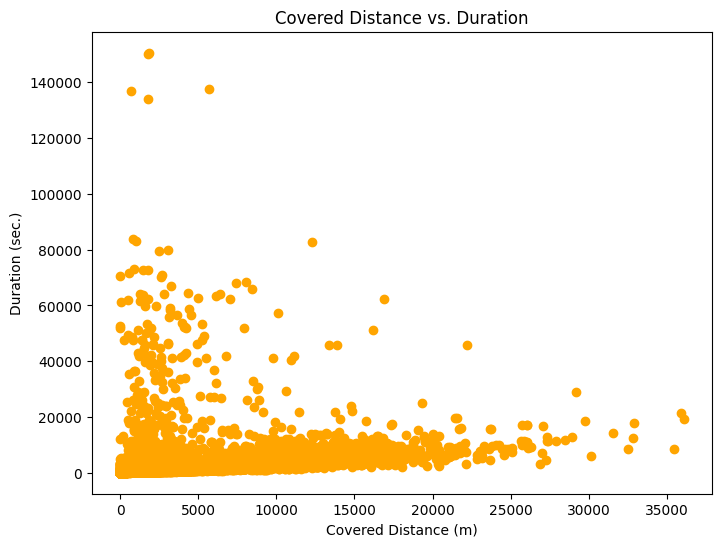

In [21]:
import matplotlib.pyplot as plt

# Scatter Plot of Covered Distance vs. Duration
plt.figure(figsize=(8, 6))
plt.scatter(combined_df['Covered distance (m)'], combined_df['Duration (sec.)'], color='orange')
plt.title('Covered Distance vs. Duration')
plt.xlabel('Covered Distance (m)')
plt.ylabel('Duration (sec.)')
plt.show()

In [32]:
monthly_covered_distance = combined_df.groupby('Month')['Covered distance (m)'].sum()
monthly_covered_distance

Month
Apr    15112125.33
Aug    15617309.67
Dec    16877979.99
Feb    10792730.01
Jan    12063595.33
Jul    22238381.34
Jun    15423649.00
Mar    13284662.66
May    15347868.34
Nov    10959855.33
Oct    13471268.65
Sep    22779999.34
Name: Covered distance (m), dtype: float64

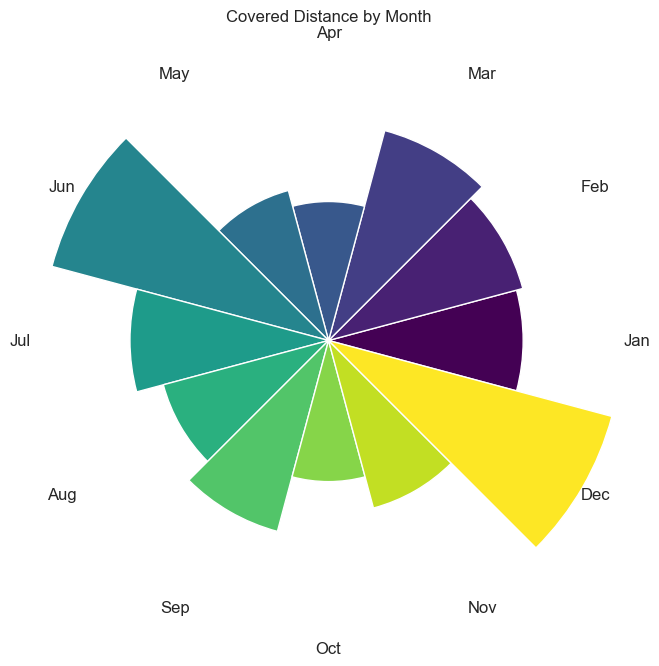

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming your data is stored in a DataFrame called 'df'

# Convert Departure column to datetime
combined_df['Departure'] = pd.to_datetime(combined_df['Departure'])

# Extract month from Departure date
df['Month'] = combined_df['Departure'].dt.strftime('%b')

# Aggregate covered distance by month
monthly_covered_distance = combined_df.groupby('Month')['Covered distance (m)'].sum()

# Plotting
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
theta = np.linspace(0, 2 * np.pi, len(months), endpoint=False)
width = (2 * np.pi) / len(months)
distance = monthly_covered_distance.values

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, projection='polar')

bars = ax.bar(theta, distance, width=width, bottom=0.0)

# Set colors for each month slice
for bar, color in zip(bars, plt.cm.viridis(np.linspace(0, 1, len(months)))):
    bar.set_facecolor(color)

# Add month labels
for i, month in enumerate(months):
    angle = i * (2 * np.pi) / len(months)
    ax.text(angle, max(distance) * 1.05, month, ha='center', va='center')

ax.set_title('Covered Distance by Month', va='bottom')

# Remove outer circle with angles and radial lines
ax.set_yticklabels([])
ax.set_xticks([])  # Remove theta ticks
ax.grid(False)
ax.spines['polar'].set_visible(False)

plt.show()

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Assuming your data is stored in a DataFrame called 'df'

# Convert Departure column to datetime
combined_df['Departure'] = pd.to_datetime(combined_df['Departure'])

# Extract month from Departure date
df['Month'] = combined_df['Departure'].dt.strftime('%b')

# Aggregate covered distance by month
monthly_covered_distance = combined_df.groupby('Month')['Duration (sec.)'].sum()

# Plotting
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
theta = np.linspace(0, 2 * np.pi, len(months), endpoint=False)
width = (2 * np.pi) / len(months)
distance = monthly_covered_distance.values

fig = go.Figure()

# Define a predefined color scheme for shades of red
red_colors = ['#FFEBEE', '#FFCDD2', '#EF9A9A', '#E57373', '#EF5350', '#F44336', '#E53935', '#D32F2F', '#C62828', '#B71C1C', '#FF8A80', '#FF5252']

# Add bars to the plot
for i, (dist, month) in enumerate(zip(distance, months)):
    fig.add_trace(go.Barpolar(
        r=[dist],
        theta=[i * (360 / len(months))],
        width=width * 180 / np.pi,
        hoverinfo='text',
        hovertext=f"{dist}",
        marker_color=red_colors[i % len(red_colors)],
    ))

# Update layout
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=False,
        ),
        angularaxis=dict(
            tickmode='array',
            tickvals=[i * (360 / len(months)) for i in range(len(months))],
            ticktext=months,
        ),
    ),
    title=dict(
        text='Duration by Month',
        x=0.5,
    ),
    showlegend=False,
)

fig.show()

In [7]:
dfc = pd.read_csv('data.csv')

In [182]:
dfc.head()

,Station,Coordinates,comments
0,0001 10th & Cambie,"(49.2622822, -123.1142145)",NaN
1,0002 Burrard Station (Melville & Dunsmuir),"(49.28645885053061, -123.12102864288579)",NaN
2,0004 Yaletown-Roundhouse Station,"(49.2744594, -123.1217156)",NaN
3,0005 Dunsmuir & Beatty,"(49.2797102, -123.1100831)",NaN
4,0006 Olympic Village Station,"(49.2665609, -123.1156986)",NaN


In [98]:
dfc.rename(columns={'Station': 'Departure station'}, inplace=True)

In [14]:
combined_df[combined_df['Membership type'].isin(['24 Hour'])]

,Departure,Return,Electric bike,Departure station,Return station,Membership type,Covered distance (m),Duration (sec.),Departure temperature (C),Return temperature (C),Stopover duration (sec.),Number of stopovers,Bike,Month
1254738,2023-10-31 18:00:00,2023-10-31 18:00,True,0066 Anderson & 2nd,0024 Hornby & Pender,24 Hour,3847.0,1599.0,7.0,11.0,0.0,0.0,30749.0,Oct
1254836,2023-10-31 18:00:00,2023-10-31 18:00,False,0189 Granville Island,0066 Anderson & 2nd,24 Hour,792.0,719.0,11.0,11.0,0.0,0.0,1827.0,Oct
1255018,2023-10-31 17:00:00,2023-10-31 18:00,False,0105 Stanley Park - Totem Poles,0209 Stanley Park - Information Booth,24 Hour,2807.0,1998.0,12.0,9.0,0.0,0.0,1808.0,Oct
1255230,2023-10-31 17:00:00,2023-10-31 17:00,False,0011 Ontario & Seawall,0189 Granville Island,24 Hour,3138.0,1098.0,12.0,10.0,0.0,0.0,1606.0,Oct
1255234,2023-10-31 17:00:00,2023-10-31 17:00,False,0011 Ontario & Seawall,0189 Granville Island,24 Hour,3128.0,1171.0,12.0,12.0,0.0,0.0,1770.0,Oct
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1548997,2024-01-01 09:00:00,2024-01-01 9:00,False,0089 Burrard & Drake,0209 Stanley Park - Information Booth,24 Hour,3808.0,1382.0,7.0,7.0,0.0,0.0,2129.0,Jan
1548998,2024-01-01 09:00:00,2024-01-01 9:00,False,0089 Burrard & Drake,0209 Stanley Park - Information Booth,24 Hour,3830.0,1303.0,6.0,9.0,0.0,0.0,702.0,Jan
1549000,2024-01-01 09:00:00,2024-01-01 9:00,False,0089 Burrard & Drake,0209 Stanley Park - Information Booth,24 Hour,3802.0,1342.0,7.0,9.0,0.0,0.0,1000.0,Jan
1549064,2024-01-01 05:00:00,2024-01-01 5:00,False,0030 Abbott & Cordova,0129 Richards & Robson,24 Hour,1357.0,609.0,7.0,8.0,0.0,0.0,1238.0,Jan


In [183]:
dfc.drop(columns=['comments'], inplace=True)

In [101]:
merged_df = pd.merge(df, dfc, on='Departure station')

In [103]:
merged_df.tail()

,Departure,Return,Electric bike,Departure station,Return station,Membership type,Covered distance (m),Duration (sec.),Departure temperature (C),Return temperature (C),Stopover duration (sec.),Number of stopovers,Month,Season,Coordinates
1379108,2024-01-10 13:00:00,2024-01-10 13:00,False,2156 Pharmaceutical Sciences,2156 Pharmaceutical Sciences,UBC Inclusive Corporate Pass,2.0,57.0,7.0,6.0,0.0,0.0,Jan,Winter,"(49.26474842889402, -123.2430141715432)"
1379109,2024-01-08 09:00:00,2024-01-08 10:00,True,2156 Pharmaceutical Sciences,2156 Pharmaceutical Sciences,Community Pass E-bike (PWD),1742.0,1820.0,0.0,-1.0,0.0,0.0,Jan,Winter,"(49.26474842889402, -123.2430141715432)"
1379110,2024-01-04 17:00:00,2024-01-04 17:00,True,2156 Pharmaceutical Sciences,2132 IK Barber Learning Centre,Pay Per Ride,1100.0,307.0,4.0,8.0,0.0,0.0,Jan,Winter,"(49.26474842889402, -123.2430141715432)"
1379111,2024-01-04 17:00:00,2024-01-04 17:00,True,2156 Pharmaceutical Sciences,2156 Pharmaceutical Sciences,Pay Per Ride,0.0,113.0,4.0,8.0,0.0,0.0,Jan,Winter,"(49.26474842889402, -123.2430141715432)"
1379112,2024-01-04 17:00:00,2024-01-04 17:00,True,2156 Pharmaceutical Sciences,2156 Pharmaceutical Sciences,Pay Per Ride,0.0,27.0,0.0,7.0,0.0,0.0,Jan,Winter,"(49.26474842889402, -123.2430141715432)"


In [104]:
df.head()

,Departure,Return,Electric bike,Departure station,Return station,Membership type,Covered distance (m),Duration (sec.),Departure temperature (C),Return temperature (C),Stopover duration (sec.),Number of stopovers,Month,Season
0,2023-02-01 00:00:00,2023-02-01 0:00,False,0228 Keefer & Hawks,0232 Britannia Parking Lot,Community Pass,1474.0,515.0,2.0,3.0,0.0,0.0,Feb,Winter
1,2023-01-31 23:00:00,2023-02-01 0:00,False,0035 Hastings & Broughton,0190 Melville & Bute,365 Day Pass Plus,11086.0,3410.0,3.0,5.0,587.0,1.0,Jan,Winter
2,2023-01-31 23:00:00,2023-02-01 0:00,False,0058 Richards & Smithe,0071 14th & Granville,30 Day Pass,4318.0,1005.0,3.0,6.0,0.0,0.0,Jan,Winter
3,2023-01-31 23:00:00,2023-02-01 0:00,False,0063 Robson & Granville,0030 Abbott & Cordova,365 Day Pass Plus,3375.0,2221.0,6.0,5.0,1044.0,5.0,Jan,Winter
4,2023-01-31 23:00:00,2023-01-31 23:00,False,0008 8th & Ash,0199 Georgia & Main,30 Day Pass,2605.0,473.0,3.0,5.0,0.0,0.0,Jan,Winter


In [135]:
dfc.head()

,Departure station,Coordinates
0,0001 10th & Cambie,"(49.2622822, -123.1142145)"
1,0002 Burrard Station (Melville & Dunsmuir),"(49.28645885053061, -123.12102864288579)"
2,0004 Yaletown-Roundhouse Station,"(49.2744594, -123.1217156)"
3,0005 Dunsmuir & Beatty,"(49.2797102, -123.1100831)"
4,0006 Olympic Village Station,"(49.2665609, -123.1156986)"


Departure station
Coordinates


In [8]:
coordinates = list(dfc['Coordinates'])

marker_locations = dfc.to_dict(orient='records')

for entry in marker_locations:
    entry['Coordinates'] = tuple(map(float, entry['Coordinates'].strip('()').split(', ')))

marker_locations

[{'Station': '0001 10th & Cambie',
  'Coordinates': (49.2622822, -123.1142145),
  'comments': nan},
 {'Station': '0002 Burrard Station (Melville & Dunsmuir)',
  'Coordinates': (49.28645885053061, -123.12102864288579),
  'comments': nan},
 {'Station': '0004 Yaletown-Roundhouse Station',
  'Coordinates': (49.2744594, -123.1217156),
  'comments': nan},
 {'Station': '0005 Dunsmuir & Beatty',
  'Coordinates': (49.2797102, -123.1100831),
  'comments': nan},
 {'Station': '0006 Olympic Village Station',
  'Coordinates': (49.2665609, -123.1156986),
  'comments': nan},
 {'Station': '0007 12th & Yukon (City Hall)',
  'Coordinates': (49.261869270826644, -123.1142389387551),
  'comments': nan},
 {'Station': '0008 8th & Ash',
  'Coordinates': (49.2642151, -123.1178195),
  'comments': nan},
 {'Station': '0009 Spyglass & Seawall',
  'Coordinates': (49.270861, -123.1150229),
  'comments': nan},
 {'Station': '0010 Stamps Landing',
  'Coordinates': (49.2686127, -123.1180201),
  'comments': nan},
 {'Stati

In [10]:
import folium

# Define the GeoJSON feature object for Vancouver boundary
vancouver_geojson = {
    "type": "Feature",
    "properties": {
        "name": "Vancouver",
        "description": "Boundary of the city of Vancouver, British Columbia, Canada"
    }
}

# Define the center of the circle (latitude, longitude) and radius in meters
center = [49.2827, -123.1207]
radius = 5000  # in meters

# Define specific locations for markers (latitude, longitude)


# Create a Folium map centered around Vancouver
map_vancouver = folium.Map(location=[49.2827, -123.1207], zoom_start=12)

# Add GeoJSON boundary to the map
folium.GeoJson(vancouver_geojson).add_to(map_vancouver)

# Add markers to specific locations
for item in marker_locations:
    location = item["Coordinates"]
    name = item["Station"]
    folium.Marker(
        location=location,
        icon=folium.Icon(icon='bicycle', prefix='fa', color='red'),
        tooltip=name  # Add place name as tooltip
    ).add_to(map_vancouver)

# Display the map
map_vancouver

In [144]:
df.head()

,Departure,Return,Electric bike,Departure station,Return station,Membership type,Covered distance (m),Duration (sec.),Departure temperature (C),Return temperature (C),Stopover duration (sec.),Number of stopovers,Month,Season
0,2023-02-01 00:00:00,2023-02-01 0:00,False,0228 Keefer & Hawks,0232 Britannia Parking Lot,Community Pass,1474.0,515.0,2.0,3.0,0.0,0.0,Feb,Winter
1,2023-01-31 23:00:00,2023-02-01 0:00,False,0035 Hastings & Broughton,0190 Melville & Bute,365 Day Pass Plus,11086.0,3410.0,3.0,5.0,587.0,1.0,Jan,Winter
2,2023-01-31 23:00:00,2023-02-01 0:00,False,0058 Richards & Smithe,0071 14th & Granville,30 Day Pass,4318.0,1005.0,3.0,6.0,0.0,0.0,Jan,Winter
3,2023-01-31 23:00:00,2023-02-01 0:00,False,0063 Robson & Granville,0030 Abbott & Cordova,365 Day Pass Plus,3375.0,2221.0,6.0,5.0,1044.0,5.0,Jan,Winter
4,2023-01-31 23:00:00,2023-01-31 23:00,False,0008 8th & Ash,0199 Georgia & Main,30 Day Pass,2605.0,473.0,3.0,5.0,0.0,0.0,Jan,Winter


In [150]:
sorted(df['Departure station'].unique())

['0001 10th & Cambie',
 '0002 Burrard Station (Melville & Dunsmuir)',
 '0004 Yaletown-Roundhouse Station',
 '0005 Dunsmuir & Beatty',
 '0006 Olympic Village Station',
 '0007 12th & Yukon (City Hall)',
 '0008 8th & Ash',
 '0009 Spyglass & Seawall',
 '0010 Stamps Landing',
 '0011 Ontario & Seawall',
 '0012 Dunsmuir & Richards',
 '0014 Canada Place',
 '0015 Granville & Georgia',
 '0016 Pender & Burrard',
 '0017 Marinaside & Davie',
 '0019 Robson & Hornby',
 '0021 Cordova & Granville',
 '0024 Hornby & Pender',
 '0025 Homer & Robson (Vancouver Public Library)',
 '0026 Beatty & Robson',
 '0027 Beatty & Nelson',
 '0028 Davie & Beach',
 '0030 Abbott & Cordova',
 '0031 Morton & Denman',
 '0032 Comox & Denman',
 '0034 Cordova & Bute',
 '0035 Hastings & Broughton',
 '0036 Bute & Robson',
 '0037 Hornby & Nelson',
 '0039 Helmcken & Burrard',
 '0040 Cardero & Davie',
 '0041 Cardero & Robson',
 '0044 Pacific & Richards',
 '0045 Beach & Hornby',
 '0047 Chilco & Beach',
 '0048 Comox & Broughton',
 '005

In [11]:
combined_df.groupby(['Departure station'])['Electric bike'].count()

Departure station
0001 10th & Cambie                            2794
0002 Burrard Station (Melville & Dunsmuir)    1916
0004 Yaletown-Roundhouse Station              1926
0005 Dunsmuir & Beatty                        3445
0006 Olympic Village Station                  2660
                                              ... 
0716 Sasamat & 10th                            192
1002 PNE - Hastings & Windermere                56
2132 IK Barber Learning Centre                  89
2143 War Memorial Gym                          117
2156 Pharmaceutical Sciences                    88
Name: Electric bike, Length: 247, dtype: int64

In [12]:
combined_df.groupby(['Return station'])['Departure'].count()

Return station
0001 10th & Cambie                            3413
0002 Burrard Station (Melville & Dunsmuir)    2194
0004 Yaletown-Roundhouse Station              3030
0005 Dunsmuir & Beatty                        3211
0006 Olympic Village Station                  3284
                                              ... 
0716 Sasamat & 10th                            153
1002 PNE - Hastings & Windermere                68
2132 IK Barber Learning Centre                  71
2143 War Memorial Gym                          116
2156 Pharmaceutical Sciences                    92
Name: Departure, Length: 247, dtype: int64

In [42]:
# Convert 'Departure' to datetime
import calendar
combined_df['Departure'] = pd.to_datetime(combined_df['Departure'])

# Extract month and season
combined_df['Month'] = combined_df['Departure'].dt.month

combined_df['Month'] = combined_df['Month'].apply(lambda x: calendar.month_abbr[x])

In [25]:
departure_counts = df.groupby(['Departure station']).agg({'Electric bike': 'count'}).reset_index()
return_counts = df.groupby(['Return station']).agg({'Electric bike': 'count'}).reset_index()

# Rename columns for clarity
departure_counts.columns = ['Station', 'Departure Count']
return_counts.columns = ['Station', 'Return Count']

# Merge the two DataFrames on Station and Month
combined_counts = pd.merge(departure_counts, return_counts, on=['Station'], how='outer').fillna(0)
combined_counts['Total Count'] = combined_counts['Departure Count'] + combined_counts['Return Count']

In [43]:
departure_counts = combined_df.groupby(['Departure station', 'Month']).agg({'Electric bike': 'count'}).reset_index()
return_counts = combined_df.groupby(['Return station', 'Month']).agg({'Electric bike': 'count'}).reset_index()

# Rename columns for clarity
departure_counts.columns = ['Station', 'Month', 'Departure Count']
return_counts.columns = ['Station', 'Month', 'Return Count']

# Merge the two DataFrames on Station and Month
combined_counts = pd.merge(departure_counts, return_counts, on=['Station', 'Month'], how='outer').fillna(0)
combined_counts['Total Count'] = combined_counts['Departure Count'] + combined_counts['Return Count']

In [44]:
combined_counts.drop(['Departure Count', 'Return Count'], axis = 1, inplace = True)

In [45]:
combined_counts

,Station,Month,Total Count
0,0001 10th & Cambie,Dec,1321.0
1,0001 10th & Cambie,Jan,1088.0
2,0001 10th & Cambie,Nov,1713.0
3,0001 10th & Cambie,Oct,2085.0
4,0002 Burrard Station (Melville & Dunsmuir),Dec,949.0
...,...,...,...
985,0070 10th & Granville,Feb,1.0
986,0187 Bute & Davie,Feb,1.0
987,0199 Georgia & Main,Feb,1.0
988,0229 Keefer & Princess,Feb,1.0


In [46]:
df2 = pd.merge(combined_counts, dfc, on = ['Station'])

In [47]:
total_counts_by_station = df2.groupby(['Station', 'Month'])['Total Count'].sum()
total_counts_by_station

Station                                     Month
0001 10th & Cambie                          Dec      1321.0
                                            Jan      1088.0
                                            Nov      1713.0
                                            Oct      2085.0
0002 Burrard Station (Melville & Dunsmuir)  Dec       949.0
                                                      ...  
2143 War Memorial Gym                       Jan       128.0
                                            Nov         4.0
2156 Pharmaceutical Sciences                Dec       128.0
                                            Jan        50.0
                                            Nov         2.0
Name: Total Count, Length: 990, dtype: float64

In [51]:
total_counts_by_station = df2.groupby(['Station', 'Coordinates', 'Month'])['Total Count'].sum().reset_index(name='Total Count')
total_counts_by_station['Month'].unique()

array(['Dec', 'Jan', 'Nov', 'Oct', 'Feb'], dtype=object)

In [49]:
marker_locations = total_counts_by_station.to_dict(orient='records')

for entry in marker_locations:
    entry['Coordinates'] = tuple(map(float, entry['Coordinates'].strip('()').split(', ')))

marker_locations

[{'Station': '0001 10th & Cambie',
  'Coordinates': (49.2622822, -123.1142145),
  'Month': 'Dec',
  'Total Count': 1321.0},
 {'Station': '0001 10th & Cambie',
  'Coordinates': (49.2622822, -123.1142145),
  'Month': 'Jan',
  'Total Count': 1088.0},
 {'Station': '0001 10th & Cambie',
  'Coordinates': (49.2622822, -123.1142145),
  'Month': 'Nov',
  'Total Count': 1713.0},
 {'Station': '0001 10th & Cambie',
  'Coordinates': (49.2622822, -123.1142145),
  'Month': 'Oct',
  'Total Count': 2085.0},
 {'Station': '0002 Burrard Station (Melville & Dunsmuir)',
  'Coordinates': (49.28645885053061, -123.12102864288579),
  'Month': 'Dec',
  'Total Count': 949.0},
 {'Station': '0002 Burrard Station (Melville & Dunsmuir)',
  'Coordinates': (49.28645885053061, -123.12102864288579),
  'Month': 'Jan',
  'Total Count': 698.0},
 {'Station': '0002 Burrard Station (Melville & Dunsmuir)',
  'Coordinates': (49.28645885053061, -123.12102864288579),
  'Month': 'Nov',
  'Total Count': 1126.0},
 {'Station': '0002 B

In [21]:
import folium

# Define the GeoJSON feature object for Vancouver boundary
vancouver_geojson = {
    "type": "Feature",
    "properties": {
        "name": "Vancouver",
        "description": "Boundary of the city of Vancouver, British Columbia, Canada"
    }
}

# Create a Folium map centered around Vancouver
map_vancouver = folium.Map(location=[49.2827, -123.1207], zoom_start=12)

# Add GeoJSON boundary to the map
folium.GeoJson(vancouver_geojson).add_to(map_vancouver)

# Add markers to specific locations
for item in marker_locations:
    location = item["Coordinates"]
    name = item["Station"]
    info = int(item["Total Count"])
    folium.Marker(
        location=location,
        icon=folium.Icon(icon='bicycle', prefix='fa', color='red'),
        tooltip=f"{name}: {info}"
    ).add_to(map_vancouver)

# Display the map
map_vancouver

In [37]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import folium
import pandas as pd

C:\Users\prana\AppData\Local\Temp\ipykernel_4108\3612916735.py:2: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
C:\Users\prana\AppData\Local\Temp\ipykernel_4108\3612916735.py:3: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


In [86]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import folium
import pandas as pd

dfc = pd.read_csv('data.csv')
dfc.drop(columns=['comments'], inplace=True)

departure_counts = combined_df.groupby(['Departure station', 'Month']).agg({'Electric bike': 'count'}).reset_index()
return_counts = combined_df.groupby(['Return station', 'Month']).agg({'Electric bike': 'count'}).reset_index()

# Rename columns for clarity
departure_counts.columns = ['Station', 'Month', 'Departure Count']
return_counts.columns = ['Station', 'Month', 'Return Count']

# Merge the two DataFrames on Station and Month
combined_counts = pd.merge(departure_counts, return_counts, on=['Station', 'Month'], how='outer').fillna(0)
combined_counts['Total Count'] = combined_counts['Departure Count'] + combined_counts['Return Count']

combined_counts.drop(['Departure Count', 'Return Count'], axis = 1, inplace = True)

df2 = pd.merge(combined_counts, dfc, on = ['Station'])

total_counts_by_station = df2.groupby(['Station', 'Coordinates', 'Month'])['Total Count'].sum().reset_index(name='Total Count')

marker_locations = total_counts_by_station.to_dict(orient='records')

for entry in marker_locations:
    entry['Coordinates'] = tuple(map(float, entry['Coordinates'].strip('()').split(', ')))
	
app = dash.Dash(__name__)

# Define the layout of your app
app.layout = html.Div([
    html.H1("Bike Stations in Vancouver"),
    html.Div(id='map-container'),
    dcc.RangeSlider(
            id='month-range-slider',
            marks={i: month[:3] for i, month in enumerate(sorted(set(item['Month'] for item in marker_locations)))},
            min=0,
            max=len(set(item['Month'] for item in marker_locations)) - 1,
            value=[0, len(set(item['Month'] for item in marker_locations)) - 1]
        ),
    dcc.Input(id='dummy-input', value='', style={'display': 'none'})  # Dummy input with a hidden style
])

# Define callback to update the map
@app.callback(
    Output('map-container', 'children'),
    [Input('month-range-slider', 'value')]  # RangeSlider input
)

def update_map(value):
    # Convert float values to integers
    value = [int(v) for v in value]

    # Filter marker locations based on selected months
    months = sorted(set(item['Month'] for item in marker_locations))
    start_month = months[value[0]]
    end_month = months[value[1]]
    filtered_marker_locations = [item for item in marker_locations if start_month <= item['Month'] <= end_month]

    # Calculate total count
    total_count = sum(item['Total Count'] for item in filtered_marker_locations)

    # Create a Folium map centered around Vancouver
    map_vancouver = folium.Map(location=[49.2827, -123.1207], zoom_start=12)

    # Add GeoJSON boundary to the map
    folium.GeoJson(vancouver_geojson).add_to(map_vancouver)

    # Add markers to specific locations
    for item in filtered_marker_locations:
        location = item["Coordinates"]
        name = item["Station"]
        info = int(item["Total Count"])
        folium.Marker(
            location=location,
            icon=folium.Icon(icon='bicycle', prefix='fa', color='red'),
            tooltip=f"{name}: {info}"
        ).add_to(map_vancouver)

    # Save the map to HTML and return it
    map_html = map_vancouver.get_root().render()
    return html.Iframe(srcDoc=map_html, width='100%', height='500')

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True, port=8058)

In [60]:
return_counts['Month'].unique()

array(['Dec', 'Jan', 'Nov', 'Oct', 'Feb'], dtype=object)

In [28]:
df2.to_csv('data.csv', index=False)

In [61]:
combined_df.groupby(['Departure station', 'Month']).agg({'Electric bike': 'count'}).reset_index()

,Departure station,Month,Electric bike
0,0001 10th & Cambie,Dec,586
1,0001 10th & Cambie,Jan,481
2,0001 10th & Cambie,Nov,776
3,0001 10th & Cambie,Oct,951
4,0002 Burrard Station (Melville & Dunsmuir),Dec,450
...,...,...,...
978,2143 War Memorial Gym,Dec,47
979,2143 War Memorial Gym,Jan,68
980,2143 War Memorial Gym,Nov,2
981,2156 Pharmaceutical Sciences,Dec,68


In [81]:
combined_df['Month'].unique()

array(['Feb', 'Jan', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

In [64]:
combined_df['Month'] = combined_df['Departure'].dt.month

In [4]:
# Convert 'Departure' to datetime
import calendar
combined_df['Departure'] = pd.to_datetime(combined_df['Departure'])

# Extract month and season
combined_df['Month'] = combined_df['Departure'].dt.month

combined_df['Month'] = combined_df['Month'].apply(lambda x: calendar.month_abbr[x])

In [87]:
combined_df.head()

,Departure,Return,Electric bike,Departure station,Return station,Membership type,Covered distance (m),Duration (sec.),Departure temperature (C),Return temperature (C),Stopover duration (sec.),Number of stopovers,Month
0,2023-02-01 00:00:00,2023-02-01 0:00,False,0228 Keefer & Hawks,0232 Britannia Parking Lot,Community Pass,1474.0,515.0,2.0,3.0,0.0,0.0,Feb
1,2023-01-31 23:00:00,2023-02-01 0:00,False,0035 Hastings & Broughton,0190 Melville & Bute,365 Day Pass Plus,11086.0,3410.0,3.0,5.0,587.0,1.0,Jan
2,2023-01-31 23:00:00,2023-02-01 0:00,False,0058 Richards & Smithe,0071 14th & Granville,30 Day Pass,4318.0,1005.0,3.0,6.0,0.0,0.0,Jan
3,2023-01-31 23:00:00,2023-02-01 0:00,False,0063 Robson & Granville,0030 Abbott & Cordova,365 Day Pass Plus,3375.0,2221.0,6.0,5.0,1044.0,5.0,Jan
4,2023-01-31 23:00:00,2023-01-31 23:00,False,0008 8th & Ash,0199 Georgia & Main,30 Day Pass,2605.0,473.0,3.0,5.0,0.0,0.0,Jan


In [89]:
combined_df[combined_df['Electric bike'] == False]

,Departure,Return,Electric bike,Departure station,Return station,Membership type,Covered distance (m),Duration (sec.),Departure temperature (C),Return temperature (C),Stopover duration (sec.),Number of stopovers,Month
0,2023-02-01 00:00:00,2023-02-01 0:00,False,0228 Keefer & Hawks,0232 Britannia Parking Lot,Community Pass,1474.0,515.0,2.0,3.0,0.0,0.0,Feb
1,2023-01-31 23:00:00,2023-02-01 0:00,False,0035 Hastings & Broughton,0190 Melville & Bute,365 Day Pass Plus,11086.0,3410.0,3.0,5.0,587.0,1.0,Jan
2,2023-01-31 23:00:00,2023-02-01 0:00,False,0058 Richards & Smithe,0071 14th & Granville,30 Day Pass,4318.0,1005.0,3.0,6.0,0.0,0.0,Jan
3,2023-01-31 23:00:00,2023-02-01 0:00,False,0063 Robson & Granville,0030 Abbott & Cordova,365 Day Pass Plus,3375.0,2221.0,6.0,5.0,1044.0,5.0,Jan
4,2023-01-31 23:00:00,2023-01-31 23:00,False,0008 8th & Ash,0199 Georgia & Main,30 Day Pass,2605.0,473.0,3.0,5.0,0.0,0.0,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1549261,2024-01-01 00:00:00,2024-01-01 1:00,False,0099 šxʷƛ̓ənəq Xwtl'e7énḵ Square - Vancouver...,0193 Science World,Pay Per Ride,10530.0,3016.0,9.0,11.0,0.0,0.0,Jan
1549263,2024-01-01 00:00:00,2024-01-01 1:00,False,0099 šxʷƛ̓ənəq Xwtl'e7énḵ Square - Vancouver...,0193 Science World,Pay Per Ride,10467.0,3086.0,10.0,11.0,0.0,0.0,Jan
1549264,2024-01-01 00:00:00,2024-01-01 0:00,False,0099 šxʷƛ̓ənəq Xwtl'e7énḵ Square - Vancouver...,0099 šxʷƛ̓ənəq Xwtl'e7énḵ Square - Vancouver...,Pay Per Ride,0.0,22.0,9.0,9.0,0.0,0.0,Jan
1549265,2024-01-01 00:00:00,2024-01-01 0:00,False,0716 Sasamat & 10th,0716 Sasamat & 10th,Pay Per Ride,1582.0,796.0,6.0,7.0,0.0,0.0,Jan


In [ ]:
pip install dashtools

In [54]:
dfs = []

# Iterate over each file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):  # Assuming all files are CSV, you can change the condition accordingly
        file_path = os.path.join(folder_path, filename)
        # Try different encodings to read the file
        for encoding in ['utf-8', 'latin-1']:  # You can add more encodings to try if needed
            try:
                df = pd.read_csv(file_path, encoding=encoding)
                dfs.append(df)  # Append the DataFrame to the list
                break  # Break the loop if reading is successful
            except UnicodeDecodeError:
                print(f"Error decoding file {filename} with encoding {encoding}. Trying another encoding...")

# Concatenate all DataFrames in the list into one
combined_df = pd.concat(dfs, ignore_index=True)

# Removing the bike column
combined_df = combined_df.drop(['Bike'], axis = 1)

# Remove NA values
combined_df.dropna(inplace=True)

# Convert 'Departure' to datetime
combined_df['Departure'] = pd.to_datetime(combined_df['Departure'])

# Extract month and season
combined_df['Month'] = combined_df['Departure'].dt.month
combined_df['Season'] = combined_df['Departure'].dt.month % 12 // 3 + 1

# Map season and month names
combined_df['Season'] = combined_df['Season'].map({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'})
combined_df['Month'] = combined_df['Month'].apply(lambda x: calendar.month_abbr[x])

# Remove rows with negative duration
combined_df = combined_df[combined_df['Duration (sec.)'] >= 0]

C:\Users\prana\AppData\Local\Temp\ipykernel_5656\1825578064.py:10: DtypeWarning: Columns (0,1,2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding=encoding)
C:\Users\prana\AppData\Local\Temp\ipykernel_5656\1825578064.py:10: DtypeWarning: Columns (0,1,2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding=encoding)
C:\Users\prana\AppData\Local\Temp\ipykernel_5656\1825578064.py:10: DtypeWarning: Columns (0,1,2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding=encoding)
C:\Users\prana\AppData\Local\Temp\ipykernel_5656\1825578064.py:10: DtypeWarning: Columns (0,1,2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding=encoding)


Error decoding file Mobi_System_Data_2023-06.csv with encoding utf-8. Trying another encoding...
Error decoding file Mobi_System_Data_2023-07.csv with encoding utf-8. Trying another encoding...


C:\Users\prana\AppData\Local\Temp\ipykernel_5656\1825578064.py:10: DtypeWarning: Columns (0,1,2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding=encoding)


Error decoding file Mobi_System_Data_2023-08.csv with encoding utf-8. Trying another encoding...


C:\Users\prana\AppData\Local\Temp\ipykernel_5656\1825578064.py:10: DtypeWarning: Columns (0,1,2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding=encoding)
C:\Users\prana\AppData\Local\Temp\ipykernel_5656\1825578064.py:10: DtypeWarning: Columns (0,1,2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding=encoding)
C:\Users\prana\AppData\Local\Temp\ipykernel_5656\1825578064.py:10: DtypeWarning: Columns (0,1,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding=encoding)
C:\Users\prana\AppData\Local\Temp\ipykernel_5656\1825578064.py:10: DtypeWarning: Columns (0,1,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding=encoding)


In [62]:
combined_df.groupby(['Season'])['Month'].unique()

Season
Fall      [Sep, Oct, Nov]
Spring    [Mar, Apr, May]
Summer    [Jun, Jul, Aug]
Winter    [Feb, Jan, Dec]
Name: Month, dtype: object